In [50]:
#importing libraries
import seaborn as sns
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import os
import time
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC


df = pd.read_csv('/content/weatherAUS.csv')
df.head(3)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [51]:
# from google.colab import drive
# drive.mount('/content/drive')

In [52]:
print('Size of data: ',len(df))
#Export file to see data
# df.to_excel(r'Original_file.xlsx', index = False)

Size of data:  145460


In [53]:
# Dropping rows with Null value in the target variable and RainToday variable
df.drop(df[pd.isnull(df['RainTomorrow'])].index, inplace=True)
df.drop(df[pd.isnull(df['RainToday'])].index, inplace=True)
df.head(3)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [54]:
print(' Size of data (number of rows left) after dropping columns with null values in RainToday and RainTomorrow variables:\n Data size:',len(df))

 Size of data (number of rows left) after dropping columns with null values in RainToday and RainTomorrow variables:
 Data size: 140787


In [55]:
# # Converting Categorical values to binary values in RainToday variable
tmp = []
for i in tqdm(range(len(df))):
  if (df.iloc[i]['RainToday']) == 'Yes':
    tmp.append(1)
  else:
    tmp.append(0)

rain_today = tmp
# print((rain_today))

100%|██████████| 140787/140787 [00:11<00:00, 12059.72it/s]


In [56]:
# Converting Categorical values to binary values in Target/RainTomorrow variable
tmp = []
for i in tqdm(range(len(df))):
  if (df.iloc[i]['RainTomorrow']) == 'Yes':
    tmp.append(1)
  else:
    tmp.append(0)

target = tmp
# print((target))

100%|██████████| 140787/140787 [00:08<00:00, 17401.38it/s]


In [57]:
#selecting variables or features for the model (select features that seems important/useful; like states/regions are dropped)
rain = df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']].copy()
rain['RainToday'] = rain_today
print('Number of records: ',len(rain))
rain.head(3)

Number of records:  140787


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0


In [58]:

# Before imputation: Number of Null values in each columns
print('---------- Before imputation: Number of null values in each columns ----------')
print('\nTotal No. of records/rows: ', len(rain))
print('MinTemp:',pd.isnull(rain['MinTemp']).sum())
print('MaxTemp:',pd.isnull(rain['MaxTemp']).sum())
print('Rainfall:',pd.isnull(rain['Rainfall']).sum())
print('Evaporation:',pd.isnull(rain['Evaporation']).sum())
print('Sunshine:',pd.isnull(rain['Sunshine']).sum())
print('WindGustSpeed:',pd.isnull(rain['WindGustSpeed']).sum())
print('WindSpeed9am:',pd.isnull(rain['WindSpeed9am']).sum())
print('WindSpeed3pm:',pd.isnull(rain['WindSpeed3pm']).sum())
print('Humidity9am:',pd.isnull(rain['Humidity9am']).sum())
print('Humidity3pm:',pd.isnull(rain['Humidity3pm']).sum())
print('Pressure9am:',pd.isnull(rain['Pressure9am']).sum())
print('Pressure3pm:',pd.isnull(rain['Pressure3pm']).sum())
print('Cloud9am:',pd.isnull(rain['Cloud9am']).sum())
print('Cloud3pm:',pd.isnull(rain['Cloud3pm']).sum())
print('Temp9am:',pd.isnull(rain['Temp9am']).sum())
print('Temp3pm:',pd.isnull(rain['Temp3pm']).sum())



---------- Before imputation: Number of null values in each columns ----------

Total No. of records/rows:  140787
MinTemp: 468
MaxTemp: 307
Rainfall: 0
Evaporation: 59694
Sunshine: 66805
WindGustSpeed: 9105
WindSpeed9am: 1055
WindSpeed3pm: 2531
Humidity9am: 1517
Humidity3pm: 3501
Pressure9am: 13743
Pressure3pm: 13769
Cloud9am: 52625
Cloud3pm: 56094
Temp9am: 656
Temp3pm: 2624


In [59]:
# Convert dataframe to numpy for imputation operation
rain_np = rain.to_numpy()
# print(rain_np)

In [60]:
# Training the imputation model [Multivariate feature imputation]
# Run time is around 2 minutes
st = time.time()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=50, random_state=1)
imp.fit(rain_np)

end = time.time()
diff = end-st
print('time: ', round(diff,2),'sec')

time:  114.9 sec


In [61]:
# Transform Null values using Multivariate feature imputation
rain_np_imp  = imp.transform(rain_np)


In [62]:
# print(type(rain_np_imp))
# rain_np_imp[0]

In [63]:
# Convert numpy data back to dataframe data
rain_imp = pd.DataFrame(rain_np_imp, columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday'])
rain_imp.head(3)
# rain_imp.to_excel(r'Original_file_imp.xlsx', index = False)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.504899,7.051956,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.106757,16.9,21.8,0.0
1,7.4,25.1,0.0,6.273177,10.853746,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.922498,2.652165,17.2,24.3,0.0
2,12.9,25.7,0.0,8.664616,11.811031,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.017205,2.000000,21.0,23.2,0.0


In [64]:
# After imputation: Number of Null values in each columns should be zero
print('---------- After imputation: Number of null values in each columns should be zero ----------')
print('\nTotal No. of records/rows: ', len(rain_imp))
print('MinTemp:',pd.isnull(rain_imp['MinTemp']).sum())
print('MaxTemp:',pd.isnull(rain_imp['MaxTemp']).sum())
print('Rainfall:',pd.isnull(rain_imp['Rainfall']).sum())
print('Evaporation:',pd.isnull(rain_imp['Evaporation']).sum())
print('Sunshine:',pd.isnull(rain_imp['Sunshine']).sum())
print('WindGustSpeed:',pd.isnull(rain_imp['WindGustSpeed']).sum())
print('Humidity9am:',pd.isnull(rain_imp['Humidity9am']).sum())
print('Humidity3pm:',pd.isnull(rain_imp['Humidity3pm']).sum())
print('Pressure9am:',pd.isnull(rain_imp['Pressure9am']).sum())
print('Pressure3pm:',pd.isnull(rain_imp['Pressure3pm']).sum())
print('Cloud9am:',pd.isnull(rain_imp['Cloud9am']).sum())
print('Cloud3pm:',pd.isnull(rain_imp['Cloud3pm']).sum())
print('Temp9am:',pd.isnull(rain_imp['Temp9am']).sum())
print('Temp3pm:',pd.isnull(rain_imp['Temp3pm']).sum())


---------- After imputation: Number of null values in each columns should be zero ----------

Total No. of records/rows:  140787
MinTemp: 0
MaxTemp: 0
Rainfall: 0
Evaporation: 0
Sunshine: 0
WindGustSpeed: 0
Humidity9am: 0
Humidity3pm: 0
Pressure9am: 0
Pressure3pm: 0
Cloud9am: 0
Cloud3pm: 0
Temp9am: 0
Temp3pm: 0


In [65]:

# (1). We are not using p-value for features selection because in backward method after 2nd iteration we reached a dead end
#      where all features have zero p-value.
#      I have documented the work(p-value) in doc file, please refer for detail (file name: Issues in data pre-processing.docx)
# (2). SelectBest method is also not effective because it just gives us training data with K features without any header,
#      difficult to identify features name.

#  For more details please see the document in the below link
# https://docs.google.com/document/d/15791_QsESwri4tQ2-tIYJV5tJWbKhvO5/edit?usp=sharing&ouid=113173886630120559872&rtpof=true&sd=true

# ------------ Random forest features selection ------------
# ---------------- Cell run time is 60 sec -----------------
from sklearn.ensemble import RandomForestClassifier

y = target
x = rain_imp
st = time.time()

forest = RandomForestClassifier(random_state=0)
forest.fit(x, y)

importances = forest.feature_importances_

end = time.time()
diff = end-st
print('time: ', round(diff,2),'sec')
print('Features selection')


time:  63.05 sec
Features selection



Features sorted as per importance:

Humidity3pm : 0.16 || Sunshine : 0.12 || Pressure3pm : 0.072 || Cloud3pm : 0.071 || Pressure9am : 0.062 || WindGustSpeed : 0.057 || Evaporation : 0.048 || Cloud9am : 0.048 || MinTemp : 0.047 || Temp9am : 0.046 || Temp3pm : 0.046 || Humidity9am : 0.046 || Rainfall : 0.045 || MaxTemp : 0.044 || WindSpeed3pm : 0.036 || WindSpeed9am : 0.033 || RainToday : 0.02 || 




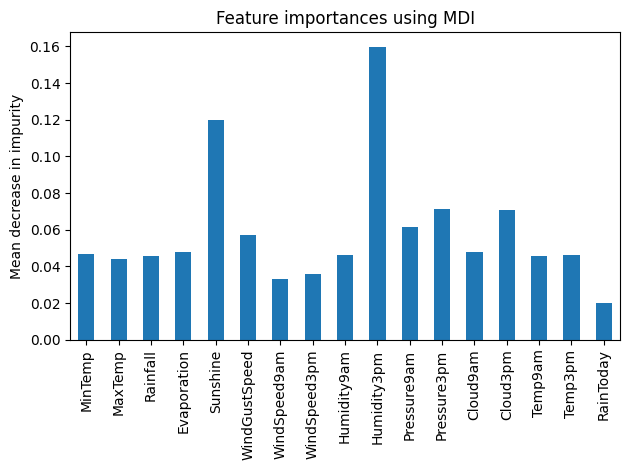

In [66]:
# Header of the columns/features, used in graph plot
COLS = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']


# Plot graph
forest_importances = pd.Series(importances, index=COLS)
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print('\nFeatures sorted as per importance:\n')
# Features importance sorted list
feat = []
for i in range(len(COLS)):
  feat.append((round(importances[i],3), COLS[i]))
feat.sort(reverse=True)

for i in feat:
  print(i[1],':',i[0],end=' || ')

print('\n\n')

In [67]:
# Feature selection: Six columns selected for the LR model based on MDI
rain_imp_feat = rain_imp[['Humidity3pm','Sunshine','Pressure3pm','Cloud3pm','Pressure9am','WindGustSpeed']].copy()
rain_imp_feat.head(3)

# Export file to see the data
# rain_imp_feat.to_excel(r'Feature_selected_imp.xlsx', index = False)

,Humidity3pm,Sunshine,Pressure3pm,Cloud3pm,Pressure9am,WindGustSpeed
0,22.0,7.051956,1007.1,5.106757,1007.7,44.0
1,25.0,10.853746,1007.8,2.652165,1010.6,44.0
2,30.0,11.811031,1008.7,2.000000,1007.6,46.0


Min: -69.825
Max: 100.0


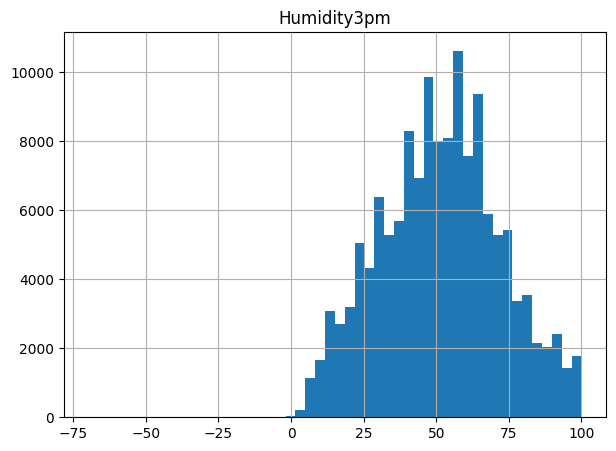

In [68]:
# Skew detection and removal

rain_imp_feat.hist(column=['Humidity3pm'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['Humidity3pm']).min(),3))
print('Max:',round((rain_imp_feat['Humidity3pm']).max(),3))

In [69]:
# After square transformation on variable 'Humidity3pm' our distribution changed from -ve skew to +ve

#  For more details please see the document in the below link
# https://docs.google.com/document/d/15791_QsESwri4tQ2-tIYJV5tJWbKhvO5/edit?usp=sharing&ouid=113173886630120559872&rtpof=true&sd=true

print('We are skipping this transformation because it flipped from -ve skew to +ve skew')


We are skipping this transformation because it flipped from -ve skew to +ve skew


Min: -3.627
Max: 21.835


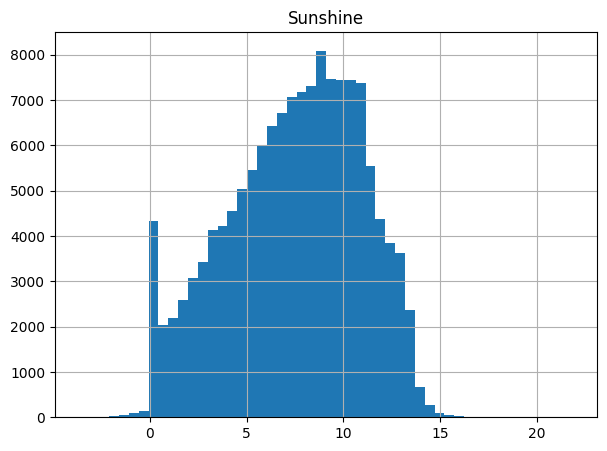

In [70]:
rain_imp_feat.hist(column=['Sunshine'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['Sunshine']).min(),3))
print('Max:',round((rain_imp_feat['Sunshine']).max(),3))

Min: 977.1
Max: 1039.6


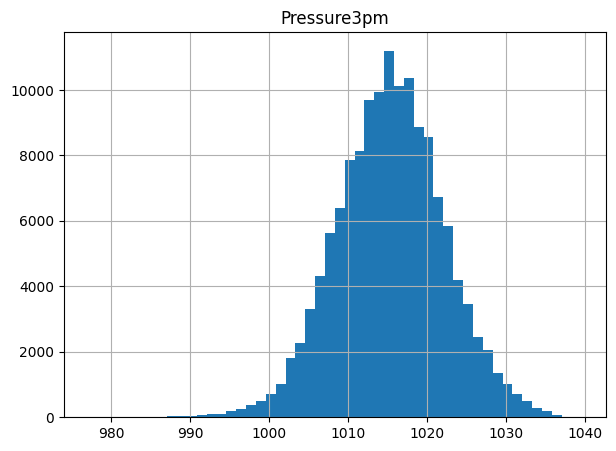

In [71]:
rain_imp_feat.hist(column=['Pressure3pm'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['Pressure3pm']).min(),3))
print('Max:',round((rain_imp_feat['Pressure3pm']).max(),3))

Min: -3.619
Max: 12.137


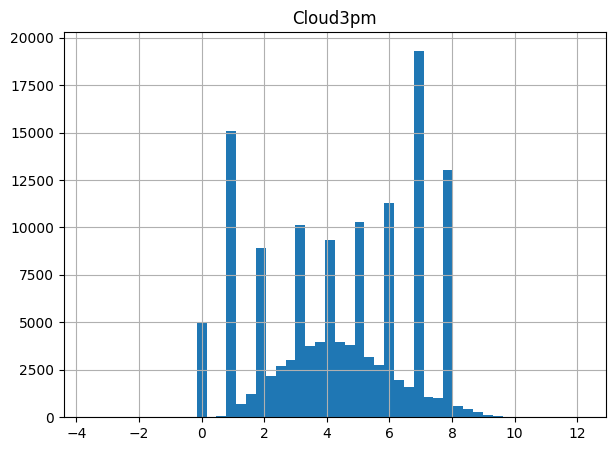

In [72]:
rain_imp_feat.hist(column=['Cloud3pm'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['Cloud3pm']).min(),3))
print('Max:',round((rain_imp_feat['Cloud3pm']).max(),3))

Min: 980.5
Max: 1041.0


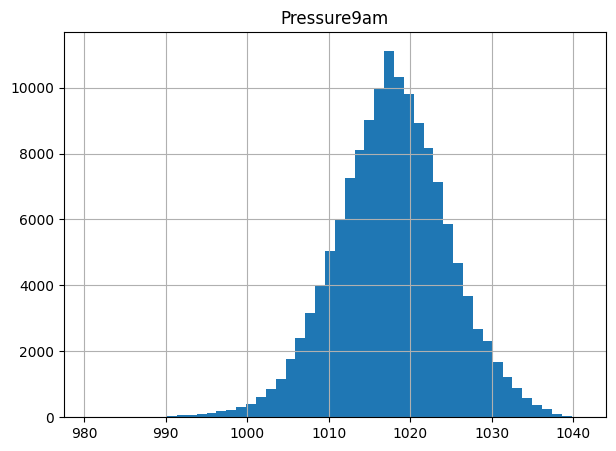

In [73]:
rain_imp_feat.hist(column=['Pressure9am'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['Pressure9am']).min(),3))
print('Max:',round((rain_imp_feat['Pressure9am']).max(),3))

Min: 6.0
Max: 141.913


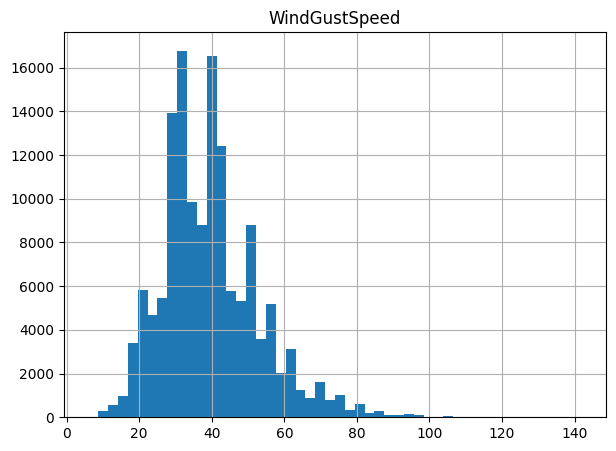

In [74]:
rain_imp_feat.hist(column=['WindGustSpeed'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['WindGustSpeed']).min(),3))
print('Max:',round((rain_imp_feat['WindGustSpeed']).max(),3))


  0%|          | 0/140787 [00:00<?, ?it/s]/tmp/ipython-input-1151231625.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  rain_imp_feat.iloc[i]['WindGustSpeed'] = math.log(rain_imp_feat.iloc[i]['WindGustSpeed'])
100%|██████████| 140787/140

Min: 1.792
Max: 4.955


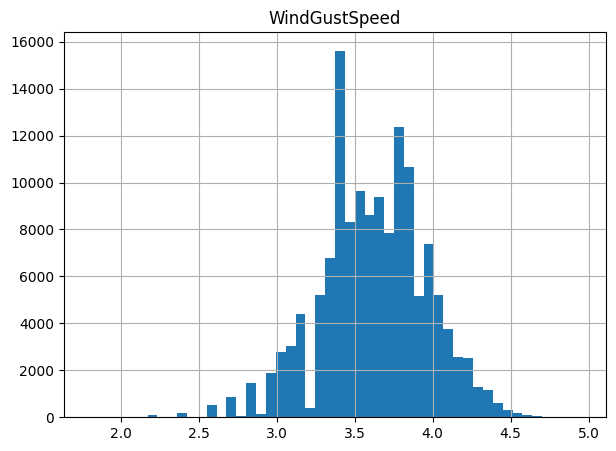

In [75]:
# # Log transformation to remove positive skewness
for i in tqdm(range(len(rain_imp_feat))):
  rain_imp_feat.iloc[i]['WindGustSpeed'] = math.log(rain_imp_feat.iloc[i]['WindGustSpeed'])

rain_imp_feat.hist(column=['WindGustSpeed'],bins=50, figsize=(7,5))
print('Min:',round((rain_imp_feat['WindGustSpeed']).min(),3))
print('Max:',round((rain_imp_feat['WindGustSpeed']).max(),3))


In [76]:
# Performing min-max normalization/scaling of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
rain_norm = min_max_scaler.fit_transform(rain_imp_feat)


In [77]:
# Convert numpy to dataframe
rain_norm = pd.DataFrame(rain_norm, columns = ['Humidity3pm','Sunshine','Pressure3pm','Cloud3pm','Pressure9am','WindGustSpeed'])
rain_norm.head(3)

,Humidity3pm,Sunshine,Pressure3pm,Cloud3pm,Pressure9am,WindGustSpeed
0,0.540703,0.419408,0.4800,0.553805,0.449587,0.629827
1,0.558368,0.568718,0.4912,0.398025,0.497521,0.629827
2,0.587810,0.606314,0.5056,0.356635,0.447934,0.643879


In [78]:
# Target variable(list) is converted to dataframe
df_tar = pd.DataFrame(target)
df_tar = df_tar.set_axis(['RainTomorrow'], axis=1)
# df_tar.head(3)

In [79]:
# Making a copy of data to be used in LR model
x_og = np.array(rain_norm.copy())
y_og = np.array(df_tar.copy())
y_og = y_og.reshape(140787,)
print(x_og.shape)
print(y_og.shape)

(140787, 6)
(140787,)


In [80]:
# ------------------------------------------- Logistic Regression Model Starts here -------------------------------------------
print('############## Logistic Regression Model Starts here ##############')

############## Logistic Regression Model Starts here ##############


In [81]:
# Set the seed value
# change it to get random set of data
seed = 5

In [82]:
# split dataset into training test samples
x_train, x_val, y_train, y_val = train_test_split(x_og, y_og, test_size=(40/100), random_state = seed)


In [83]:
# Making an instance of the Model
lr_model = LogisticRegression(random_state = seed, solver='lbfgs',max_iter = 50000)

# training the model
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=50000, random_state=5)

In [84]:
# Making prediction for training data
predictions_train = lr_model.predict(x_train)

# Making prediction for validation data
predictions = lr_model.predict(x_val)


In [85]:
# Calculating Accuracy for training data
accuracy_train = lr_model.score(x_train, y_train)
print('Accuracy of the LR model for training data is: ',(round((accuracy_train*100),2)))

# Calculating Accuracy validation data
accuracy = lr_model.score(x_val, y_val)
print('Accuracy of the LR model for validation data is: ',(round((accuracy*100),2)))


Accuracy of the LR model for training data is:  84.18
Accuracy of the LR model for validation data is:  84.41


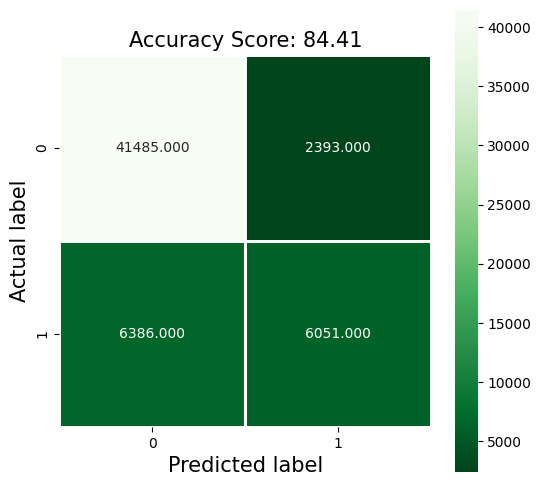

In [86]:
# Making confusion matrix
cm = metrics.confusion_matrix(y_val, predictions)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Greens_r' );
plt.ylabel('Actual label',size=15);
plt.xlabel('Predicted label',size=15);
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy*100,2))
plt.title(all_sample_title, size = 15);

In [87]:
# ------------------------------------------- Logistic Regression Model from scratch without library function use -------------------------------------------
print('############## Logistic Regression Model from scratch without library function use ##############\n')


############## Logistic Regression Model from scratch without library function use ##############



In [88]:
# Add bias/intercept column in LR equation
tmp = [1] * len(rain_norm)
rain_norm['Bias'] = tmp

# Making a copy of data to be used in LR model
x_ogs = np.array(rain_norm.copy())
y_ogs = np.array(df_tar.copy())
y_ogs = y_ogs.reshape(len(y_ogs),)
print(x_ogs.shape)
print(y_ogs.shape)

(140787, 7)
(140787,)


In [89]:
# split dataset into training test samples: training - 70%; validation - 30%
x_train, x_val, y_train, y_val = train_test_split(x_ogs, y_ogs, test_size=(30/100), random_state = seed)
print('Data size:',len(x_ogs))
print('Train data size:',len(x_train))
print('Validation data size:',len(x_val))

Data size: 140787
Train data size: 98550
Validation data size: 42237


In [90]:
# initializing weight/beta coeff array
tmp = [0] * (7)
wt = np.array([tmp])
print('Weight array:',wt)

# Set number of iterations
iteration = 9000
print('Iterations: ',iteration)

# Set learning rate
lr = 0.03
print('Learning rate: ',lr)

Weight array: [[0 0 0 0 0 0 0]]
Iterations:  9000
Learning rate:  0.03


In [91]:
#hypothesis/prediction function
def prediction(feature, wt):
    feature = feature.transpose()
    z = np.dot(wt, feature)
    return 1.0 / (1 + np.exp(-z))


#Cost function
def cost(pred, real):
    c = (np.dot(np.log(pred), real) + np.dot(np.log(1-pred), (1-real)))/(-len(pred))
    return (c)


#gradient descent function
def grad(w, lr, real, pred, feat):
    global wt
    real = real.transpose()
    gradient = (np.dot((pred - real),feat))/len(real)

    #adjusting weight
    wt = w - (lr * gradient)

#cost array
cst1 = []
cst2 = []

#accuracy array
act = []  #train
acv = []  #val

#accuracy function
def accuracy(features, real):
    tt = prediction(features, wt)
    acc = ((np.where(tt >= 0.5, 1, 0) == real).sum())/len(real)
    return acc


In [92]:

# Training the model
# Takes around 3-5 minutes for 10k iterations

st = time.time()

for i in tqdm(range(iteration)):
    h_train = prediction(x_train, wt)
    h_val = prediction(x_val, wt)
    grad(wt, lr, y_train, h_train, x_train)
    cst1.append(cost(h_train, y_train))
    cst2.append(cost(h_val, y_val))
    act.append(accuracy(x_train, y_train))
    acv.append(accuracy(x_val, y_val))

end = time.time()
diff = end-st
print('\ntime: ', round(diff,2),'sec')

100%|██████████| 9000/9000 [03:22<00:00, 44.39it/s]


time:  202.73 sec


In [93]:

#calling accuracy function to get accuracy
train_acc = accuracy(x_train, y_train)
train_acc = round((train_acc * 100),2)
print('\nTraining data accuracy: ',train_acc)

val_acc = accuracy(x_val, y_val)
val_acc = round((val_acc * 100),2)
print('\nValidation data accuracy: ',val_acc)



Training data accuracy:  83.14

Validation data accuracy:  83.31


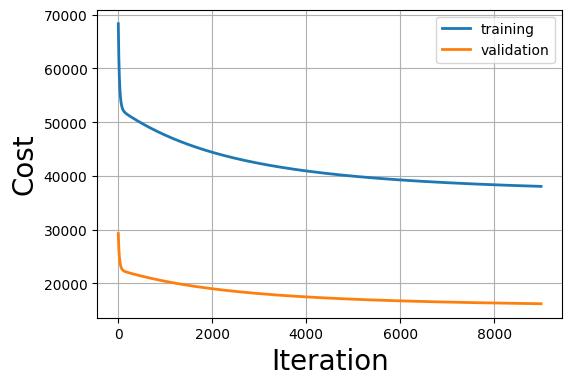

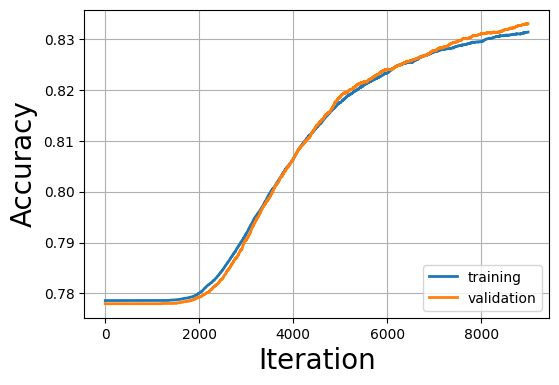


Training data accuracy:  83.14

Validation data accuracy:  83.31


In [94]:

#cost function plot
#print('\nCost function progress:\n')
plt.figure(figsize=(6, 4))
plt.plot(np.arange(iteration), cst1 , label ='training', linewidth = 2)
plt.plot(np.arange(iteration), cst2, label = 'validation',  linewidth = 2)
plt.xlabel('Iteration', size=20)
plt.ylabel('Cost', size=20)
plt.legend(loc='upper right')
plt.grid()
plt.show(block=False)
plt.pause(7)
plt.close()

#Accuracy function plot
print('\n')
plt.figure(figsize=(6, 4))
plt.plot(np.arange(iteration), act , label ='training', linewidth = 2)
plt.plot(np.arange(iteration), acv, label = 'validation', linewidth = 2)
plt.xlabel('Iteration', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(loc='lower right')
plt.grid()
plt.show(block=False)
plt.pause(7)
plt.close()


print('\nTraining data accuracy: ',train_acc)
print('\nValidation data accuracy: ',val_acc)

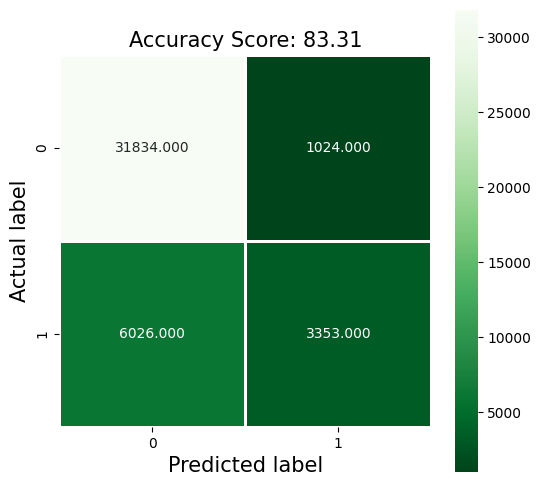

In [95]:
# Making confusion matrix
predictions = np.where(prediction(x_val, wt) >= 0.5, 1, 0)
cm = metrics.confusion_matrix(y_val, predictions[0])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Greens_r' );
plt.ylabel('Actual label',size=15);
plt.xlabel('Predicted label',size=15);
all_sample_title = 'Accuracy Score: {0}'.format(val_acc)
plt.title(all_sample_title, size = 15);

In [96]:
# Display beta coefficient or weight of features
weight = ['Humidity3pm', 'Sunshine', 'Pressure3pm', 'Cloud3pm', 'Pressure9am', 'WindGustSpeed']
for i in range(len(weight)):
  print(weight[i],':',round(wt[0][i],2))

Humidity3pm : 2.51
Sunshine : -3.51
Pressure3pm : -1.89
Cloud3pm : 2.22
Pressure9am : -1.96
WindGustSpeed : 0.86
